# EXERCICE 7 : REGRESSION LINEAIRE MULTIPLE AVEC REGULARISATION + VALIDATION CROISEE


Inspire de http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html


In [2]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error


#### Génération de donnée synthétiques...

In [3]:

np.random.seed(31)

def SimulateObservations2(n,p):
    #... definition de n et p
    # n = 75
    # p =  200   #remarque : n<200 => necessite de selectionner des variables

    #... simulation de X
    X = np.random.randn(n, p) #remarque : on ne tient pas en compte les $beta_0$

    #... generation du vecteur beta dans lequel seules 10 valeurs sont non-nulles
    beta = 3 * np.random.randn(p)
    inds = np.arange(p)
    np.random.shuffle(inds)
    beta[inds[10:]] = 0 

    #... simulation de y 
    y = np.dot(X, beta) + (2.0 * np.random.normal(size=n))


    # REMARQUE IMPORTANTE : y ne dépend que des variables i pour lesquelles beta[i] est non-nul


    # ... coupe en deux les donnees en donnees d'apprentissage et donnes test
    thresh=n // 2
    X_train = X[thresh:]
    y_train = y[thresh:]
    X_test = X[:thresh]
    y_test = y[:thresh]

    return X_train, y_train, X_test, y_test, beta

X_train, y_train, X_test, y_test, beta =SimulateObservations2(75,200)


#### Régression linéaire avec régularisation Lasso ...


In [4]:

from sklearn.linear_model import Lasso

alpha = 0.5
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)
mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)


####  Représentation du résultat


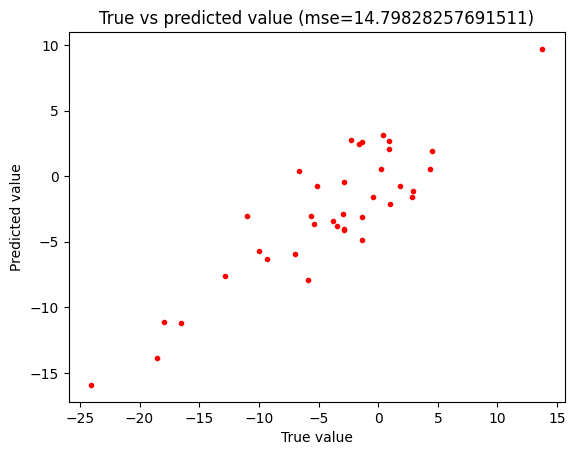

In [5]:
def plot(y_test,y_pred_lasso,mse_score_lasso):  
    fig = plt.figure()
    plt.plot(y_test, y_pred_lasso, 'r.')
    plt.xlabel('True value')
    plt.ylabel('Predicted value')
    plt.title('True vs predicted value (mse='+str(mse_score_lasso)+')')
    plt.show()

plot(y_test,y_pred_lasso,mse_score_lasso)


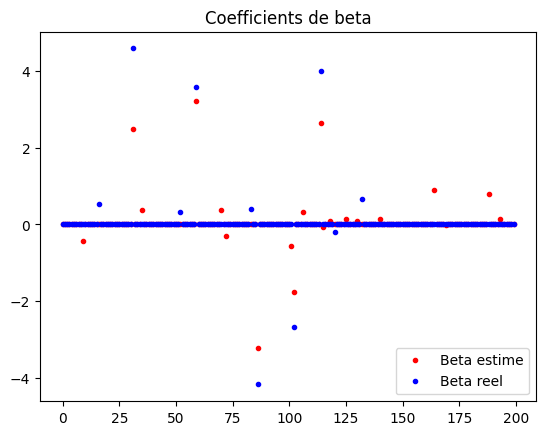

In [6]:

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()



### <span style="color:blue">QUESTION 1</span> :

Jouez l'exemple avec  n=1000, n=100, n=75, n=50, n=25. Qu'en deduisez vous sur l'impact du nombre d'observations

### <span style="color:blue">REPONSE 1</span> :

...


n=1000


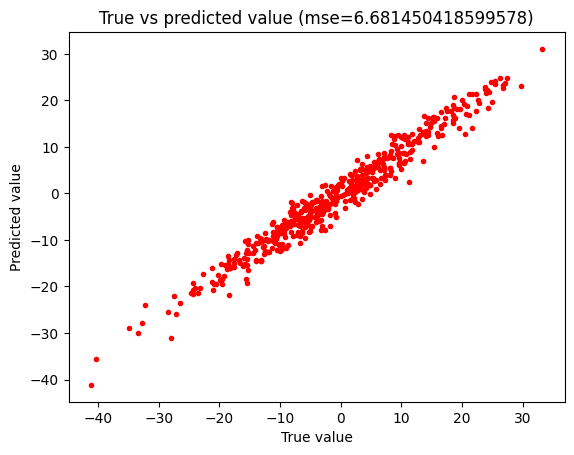

n=100


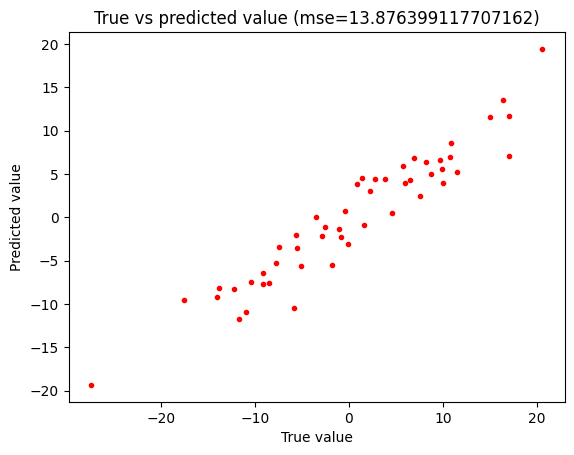

n=50


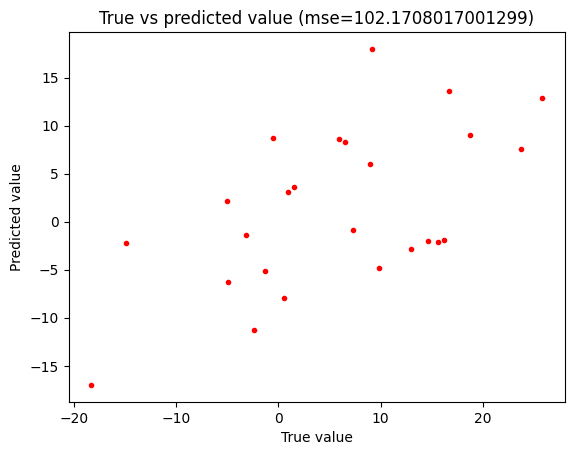

n=25


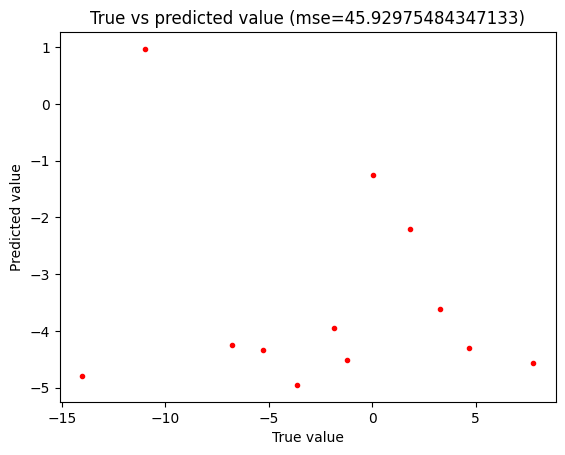

In [7]:
n_s = [1000,100,50,25]

for n in n_s:
    print(f"n={n}")
    X_l,y_l,X_t,y_t,RefTheta=SimulateObservations2(n,200)
    alpha = 0.5

    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_l, y_l)

    y_pred_lasso = lasso_regressor.predict(X_t)
    mse_score_lasso = mean_squared_error(y_t, y_pred_lasso)

    plot(y_t,y_pred_lasso,mse_score_lasso)

On remarque que plus n est grand plus la mse est faible, ce qui parrait logique car en augmentant le nombre d'observations on prend en compte plus d'inofrmations.



### <span style="color:blue">QUESTION 2</span> :

On garde n=75. Utilisez la validation croisee de type K-folds (typiquement 8-Folds) pour trouver le meilleur coefficient *alpha* au sens de la MSE. Pour chaque *alpha* testé, on gardera comme score la MSE moyenne obtenue sur tous les *folds*.

Remarque : la recherche d'un bon coefficient *alpha* pourra d'abord se faire sur une échelle exponentielle assez large (ex: 0.001, 0.01, 0.1, ...) puis être raffinée sur une échelle plus fine.  

### <span style="color:blue">REPONSE 2</span> :

In [ ]:

from sklearn.model_selection import KFold

alphas = [0.001, 0.01, 0.1 , 0.14, 0.18, 0.22, 0.25,0.26, 0.27,0.3]

first_print = True
for alpha in alphas:    
    print(f"alpha={alpha}")
    kf = KFold(n_splits=8, shuffle=True, random_state=42)
    mse_scores = []

    for train_index, val_index in kf.split(X_train):
        if first_print:
            print("TRAIN:", train_index, "VAL:", val_index)
            first_print = False
        X_train_kf, X_val_kf = X_train[train_index], X_train[val_index]
        y_train_kf, y_val_kf = y_train[train_index], y_train[val_index]

        lasso_regressor = Lasso(alpha=alpha)
        lasso_regressor.fit(X_train_kf, y_train_kf)

        y_val_pred = lasso_regressor.predict(X_val_kf)
        mse_score = mean_squared_error(y_val_kf, y_val_pred)
        mse_scores.append(mse_score)

    avg_mse = np.mean(mse_scores)
    print(f"Average MSE for alpha={alpha}: {avg_mse}")

alpha=0.001
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 31 32 34 35 37] VAL: [ 4 13 30 33 36]
Average MSE for alpha=0.001: 107.98109870578506
alpha=0.01
Average MSE for alpha=0.01: 43.6141363844379
alpha=0.1
Average MSE for alpha=0.1: 39.381870599422115
alpha=0.14
Average MSE for alpha=0.14: 38.23264536601248
alpha=0.18


/Users/tomkarch/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.633e-01, tolerance: 2.151e-01
  model = cd_fast.enet_coordinate_descent(
/Users/tomkarch/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.402e-01, tolerance: 2.195e-01
  model = cd_fast.enet_coordinate_descent(
/Users/tomkarch/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

Average MSE for alpha=0.18: 37.4987662804884
alpha=0.22
Average MSE for alpha=0.22: 37.20829143794669
alpha=0.25
Average MSE for alpha=0.25: 37.26586264935451
alpha=0.26
Average MSE for alpha=0.26: 37.217874021876334
alpha=0.27
Average MSE for alpha=0.27: 37.223251176128066
alpha=0.3
Average MSE for alpha=0.3: 37.56685691689234


alpha 0.26 semble minimiser la MSE

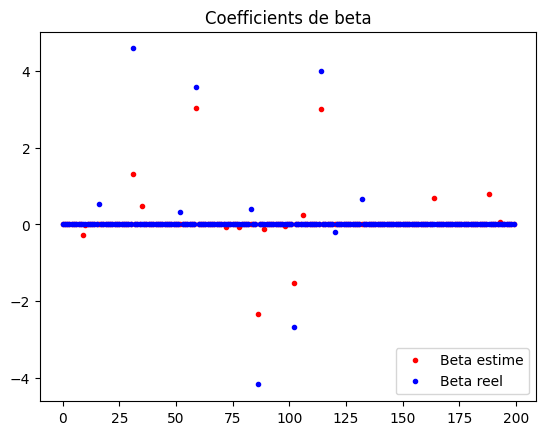

In [9]:
#représentation des coefficients estimés (lasso_regressor.coef_) et de ceux
#avec lesquels les données ont été simulées (beta)

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()


### <span style="color:blue">QUESTION 3</span> :

De manère alternative, codez et testez maintenant une sélection de type *forward* avec un critère de sélection *BIC*.

Comparez les résultats avec ceux obtenus à l'aide de la pénalisation LASSO.

### <span style="color:blue">REPONSE 3</span> :


In [10]:


from sklearn.linear_model import LinearRegression

#...

